## [1] Oxford데이터 segmentation 살펴보기
- 옥스퍼드-IIIT 펫 데이터셋은 옥스퍼드 대학의 Visual Geometry Group (VGG)에서 만든, 컴퓨터 비전 작업을 위해 널리 사용되는 이미지 데이터셋입니다.
- 특히 이미지 분류, 객체 위치 파악(Localization),  분할(Segmentation) 작업에 유용하게 설계되었습니다.

- 카테고리 및 이미지 수:
  - 37가지의 고양이와 강아지 품종으로 구성되어 있습니다.
  -  이미지 다양성:
      - 이미지들은 크기, 자세, 조명 등에서 큰 변화를 보여, 모델의 일반화 능력을 테스트하는 데 적합합니다.

In [1]:

from torchvision.datasets import OxfordIIITPet
import matplotlib.pyplot as plt
import numpy as np
BASE_DIR= r"D:\01.project\CodeIt\mission8\data\petdata"
# 다운로드
print("Oxford Pet 데이터셋 다운로드 중...")
pet_dataset = OxfordIIITPet(root=BASE_DIR, split='trainval',
                             target_types='segmentation',
                             download=True)

print(f"다운로드 완료! 총 {len(pet_dataset)}장")

Oxford Pet 데이터셋 다운로드 중...


100%|██████████| 792M/792M [09:23<00:00, 1.41MB/s]  
100%|██████████| 19.2M/19.2M [00:15<00:00, 1.21MB/s]


다운로드 완료! 총 3680장


# 어노테이션(Annotation)의 종류 (분할에 중요)
- 이 데이터셋의 가장 큰 특징은 다양한 종류의 정답(Ground Truth) 어노테이션을 제공한다는 점이며, 특히 분할(Segmentation)을 위한 어노테이션을 포함하고 있습니다.

- 품종 분류 (Classification):
  - 각 이미지에는 해당 동물의 정확한 품종 이름(예: 'Abyssinian', 'beagle' 등)이 레이블로 지정되어 있습니다.

- 객체 위치 파악 (Object Localization):
  - 동물의 머리 주변 영역(Head ROI)에 대한 바운딩 박스(Bounding Box) 정보가 제공됩니다.

- 픽셀 수준 분할 (Pixel-level Segmentation) - Trimap:

  - 가장 중요한 분할 어노테이션은 트리맵(Trimap) 형태로 제공됩니다.
  - 트리맵은 각 픽셀에 대해 다음 3가지 중 하나의 레이블을 부여합니다.
    - 1: 전경(Foreground) - 고양이 또는 강아지 자체에 속하는 픽셀.
    - 2: 배경(Background) - 이미지에서 동물 외의 부분에 속하는 픽셀.
    - 3: 경계/불확실 영역(Border/Unknown) - 전경과 배경 사이의 경계 영역으로, 모델이 이 영역을 분류하도록 학습할 때 사용될 수 있습니다.

          트리맵은 이미지를 세 가지 구분된 영역으로 정의하는 맵이라는 뜻
          Tri (트라이): 숫자 셋(Three)을 의미하는 접두사
          Map (맵): 지도나 영역을 표시하고 매핑하는 것을 의미


In [2]:
pet_dataset

Dataset OxfordIIITPet
    Number of datapoints: 3680
    Root location: D:\01.project\CodeIt\mission8\data\petdata


다운로드된 파일 확인:
['oxford-iiit-pet']


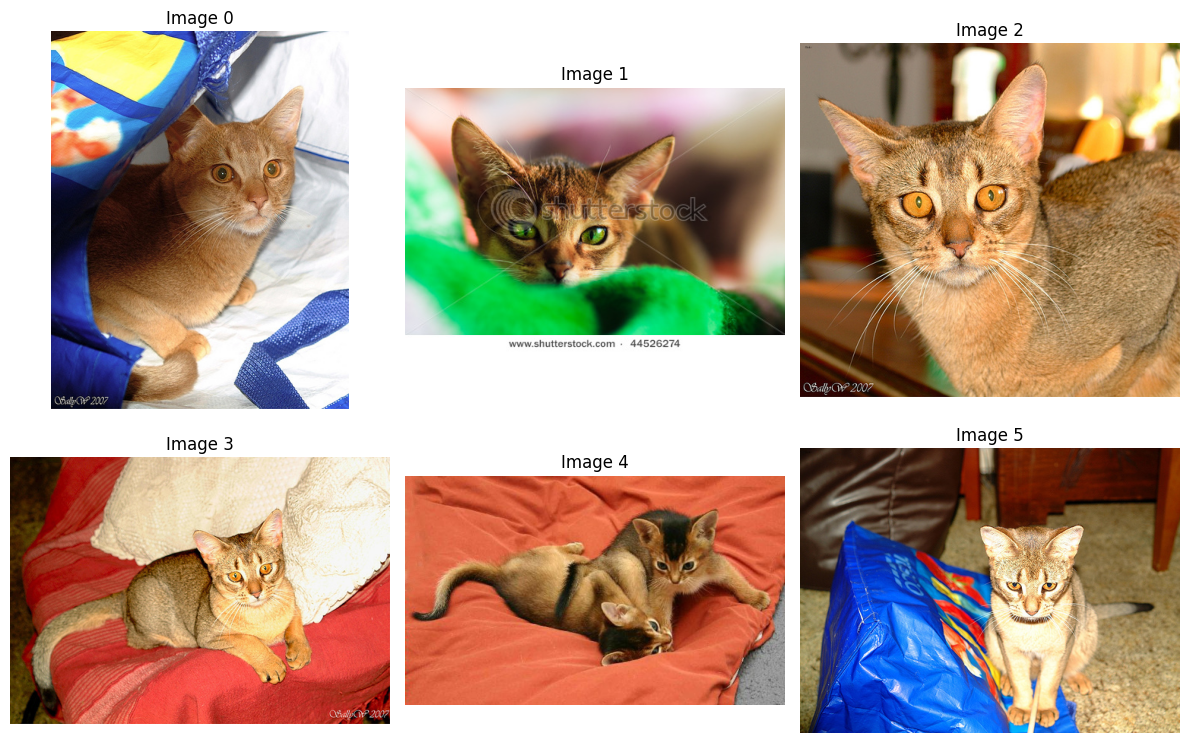

In [4]:
# 실제로 몇 장 있는지 확인
import os

print("\n다운로드된 파일 확인:")
print(os.listdir(BASE_DIR))

# 이미지 몇 개 더 볼까?
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i in range(6):
    img, mask = pet_dataset[i]
    axes[i].imshow(img)
    axes[i].set_title(f'Image {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [5]:
pet_dataset[0]

(<PIL.Image.Image image mode=RGB size=394x500>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=394x500>)

In [6]:
#-----------------------------
# 마스크 값 자세히 보기
img, mask = pet_dataset[0]

# numpy 배열로 변환
mask_array = np.array(mask)

mask_array

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], shape=(500, 394), dtype=uint8)

In [7]:


print(f"마스크 shape: {mask_array.shape}")
print(f"마스크 dtype: {mask_array.dtype}")
print(f"\n마스크 unique 값들: {np.unique(mask_array)}")
print(f"각 값의 개수:")
for val in np.unique(mask_array):
    count = np.sum(mask_array == val)
    percent = count / mask_array.size * 100
    print(f"  값 {val}: {count}개 ({percent:.1f}%)")

마스크 shape: (500, 394)
마스크 dtype: uint8

마스크 unique 값들: [1 2 3]
각 값의 개수:
  값 1: 52806개 (26.8%)
  값 2: 114847개 (58.3%)
  값 3: 29347개 (14.9%)


Oxford Pet 세그멘테이션:
  클래스 1: 전경/동물 (Foreground)
  클래스 2: 배경 (Background)
  클래스 3: 경계선 (Boundary)

실제 마스크 값: [1 2 3]


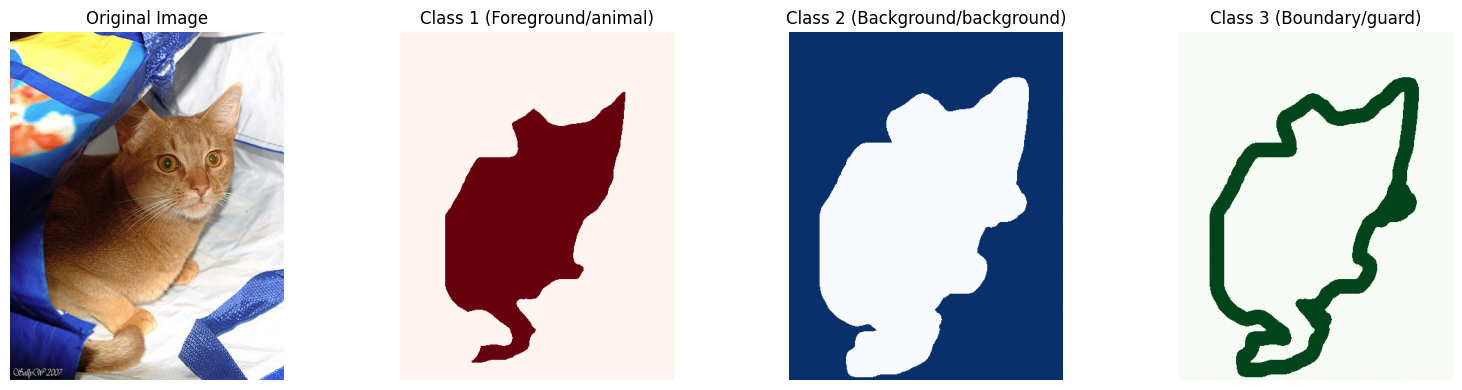

In [8]:
# 각 클래스별로 분리해서 보기
print("Oxford Pet 세그멘테이션:")
print("  클래스 1: 전경/동물 (Foreground)")
print("  클래스 2: 배경 (Background)")
print("  클래스 3: 경계선 (Boundary)")
print(f"\n실제 마스크 값: {np.unique(mask_array)}")

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask_array == 1, cmap='Reds')
axes[1].set_title('Class 1 (Foreground/animal)')
axes[1].axis('off')

axes[2].imshow(mask_array == 2, cmap='Blues')
axes[2].set_title('Class 2 (Background/background)')
axes[2].axis('off')

axes[3].imshow(mask_array == 3, cmap='Greens')
axes[3].set_title('Class 3 (Boundary/guard)')
axes[3].axis('off')

plt.tight_layout()
plt.show()

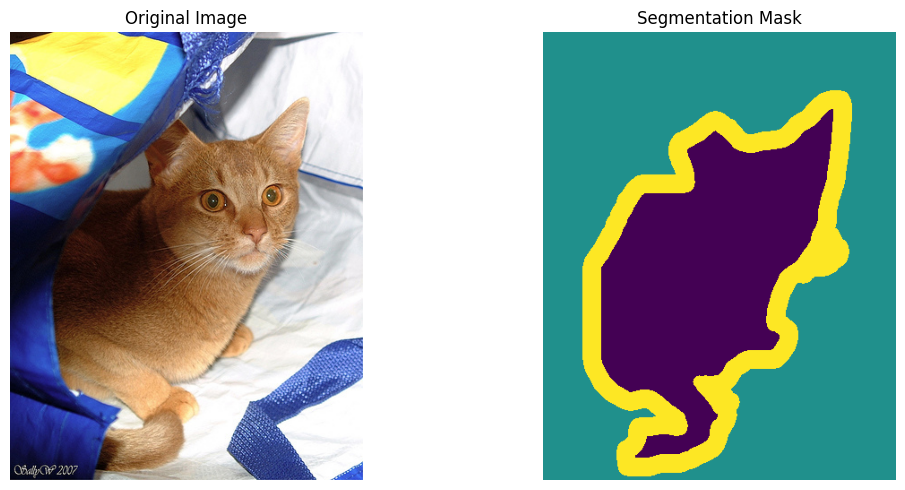


마스크 설명:
1 = 전경 (동물)
2 = 배경
3 = 경계선

실제 마스크 값: [1 2 3]


In [9]:
# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask)
axes[1].set_title('Segmentation Mask')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\n마스크 설명:")
print("1 = 전경 (동물)")
print("2 = 배경")
print("3 = 경계선")
print(f"\n실제 마스크 값: {np.unique(np.array(mask))}")

In [10]:
# Resize 과정을 한 개 이미지로 명확히 보기

img, mask = pet_dataset[0]

print("=== Resize 전후 비교 ===\n")

# Resize 전 (원본)
print("【Resize 전】")
mask_before = np.array(mask)
print(f"크기: {mask_before.shape}")
print(f"픽셀 개수: {mask_before.shape[0]} x {mask_before.shape[1]} = {mask_before.size:,}개")
print(f"unique 값: {np.unique(mask_before)}")

# Resize 후
print("\n【Resize 후】")
mask_resized = T.Resize((128, 128), interpolation=T.InterpolationMode.NEAREST)(mask)
mask_after = np.array(mask_resized)
print(f"크기: {mask_after.shape}")
print(f"픽셀 개수: {mask_after.shape[0]} x {mask_after.shape[1]} = {mask_after.size:,}개")
print(f"unique 값: {np.unique(mask_after)}")

=== Resize 전후 비교 ===

【Resize 전】
크기: (500, 394)
픽셀 개수: 500 x 394 = 197,000개
unique 값: [1 2 3]

【Resize 후】


NameError: name 'T' is not defined

In [ ]:
# 시각적으로 비교
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 원본 이미지
axes[0].imshow(np.array(img))
axes[0].set_title(f'Original Image\n{img.size[0]} x {img.size[1]}', fontsize=14, fontweight='bold')
axes[0].axis('off')

# Resize 전 마스크
axes[1].imshow(mask_before, cmap='tab20')
axes[1].set_title(f'Mask BEFORE Resize\n{mask_before.shape[1]} x {mask_before.shape[0]}\n({mask_before.size:,} pixels)',
                  fontsize=14, fontweight='bold', color='red')
axes[1].axis('on')
axes[1].grid(False)

# Resize 후 마스크
axes[2].imshow(mask_after, cmap='tab20')
axes[2].set_title(f'Mask AFTER Resize\n{mask_after.shape[1]} x {mask_after.shape[0]}\n({mask_after.size:,} pixels)',
                  fontsize=14, fontweight='bold', color='blue')
axes[2].axis('on')
axes[2].grid(False)

plt.tight_layout()
plt.show()

print(f"\n크기 변화: {mask_before.shape} → {mask_after.shape}")
print(f"픽셀 개수: {mask_before.size:,}개 → {mask_after.size:,}개")

In [ ]:
# More visual comparison with pixel values displayed

fig = plt.figure(figsize=(18, 8))

# BEFORE: Small region with numbers
ax1 = plt.subplot(2, 3, 1)
crop_before = mask_before[:10, :10]
im1 = ax1.imshow(crop_before, cmap='tab20', interpolation='nearest', vmin=0, vmax=3)
ax1.set_title('BEFORE Resize\n10x10 region', fontsize=14, fontweight='bold')

# Add pixel values as text
for i in range(10):
    for j in range(10):
        text = ax1.text(j, i, int(crop_before[i, j]),
                       ha="center", va="center", color="white", fontsize=8, fontweight='bold')
plt.colorbar(im1, ax=ax1)

# AFTER: Small region with numbers
ax2 = plt.subplot(2, 3, 2)
crop_after = mask_after[:10, :10]
im2 = ax2.imshow(crop_after, cmap='tab20', interpolation='nearest', vmin=0, vmax=3)
ax2.set_title('AFTER Resize\n10x10 region', fontsize=14, fontweight='bold')

# Add pixel values as text
for i in range(10):
    for j in range(10):
        text = ax2.text(j, i, int(crop_after[i, j]),
                       ha="center", va="center", color="white", fontsize=8, fontweight='bold')
plt.colorbar(im2, ax=ax2)

# Stats comparison
ax3 = plt.subplot(2, 3, 3)
ax3.axis('off')
stats_text = f"""
SIZE CHANGE:
Before: {mask_before.shape}
After:  {mask_after.shape}

PIXEL COUNT:
Before: {mask_before.size:,}
After:  {mask_after.size:,}

UNIQUE VALUES:
Before: {np.unique(mask_before)}
After:  {np.unique(mask_after)}

CLASS DISTRIBUTION (BEFORE):
Class 1: {np.sum(mask_before==1):,} pixels
Class 2: {np.sum(mask_before==2):,} pixels
Class 3: {np.sum(mask_before==3):,} pixels

CLASS DISTRIBUTION (AFTER):
Class 1: {np.sum(mask_after==1):,} pixels
Class 2: {np.sum(mask_after==2):,} pixels
Class 3: {np.sum(mask_after==3):,} pixels
"""
ax3.text(0.1, 0.5, stats_text, fontsize=11, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Full image comparison
ax4 = plt.subplot(2, 3, 4)
ax4.imshow(mask_before, cmap='tab20')
ax4.set_title(f'BEFORE Full Mask\n{mask_before.shape[1]}x{mask_before.shape[0]}', fontsize=12)
ax4.set_xlabel(f'{mask_before.size:,} pixels', fontsize=10)

ax5 = plt.subplot(2, 3, 5)
ax5.imshow(mask_after, cmap='tab20')
ax5.set_title(f'AFTER Full Mask\n{mask_after.shape[1]}x{mask_after.shape[0]}', fontsize=12)
ax5.set_xlabel(f'{mask_after.size:,} pixels', fontsize=10)

# Original image
ax6 = plt.subplot(2, 3, 6)
ax6.imshow(np.array(img))
ax6.set_title(f'Original Image\n{img.size[0]}x{img.size[1]}', fontsize=12)
ax6.axis('off')

plt.tight_layout()
plt.show()

## [2] fcn

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import OxfordIIITPet
import torchvision.transforms as T
import numpy as np

# 1. Dataset
class PetDataset(Dataset):
    def __init__(self):
        self.pet = OxfordIIITPet(root='./data', split='trainval',
                                  target_types='segmentation', download=True)

    def __len__(self):
        return len(self.pet)

    def __getitem__(self, idx):
        img, mask = self.pet[idx]

        # 이미지 전처리
        img = T.Resize((128, 128))(img)
        img = T.ToTensor()(img)

        # 마스크 전처리
        mask = T.Resize((128, 128), interpolation=T.InterpolationMode.NEAREST)(mask)
        mask = torch.tensor(np.array(mask), dtype=torch.long)
        mask = mask - 1  # 1,2,3 -> 0,1,2

        return img, mask

# 2. FCN 모델
class FCN(nn.Module):
    def __init__(self):
        super().__init__()
        # 인코더
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # 디코더
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.up2 = nn.ConvTranspose2d(64, 3, 2, stride=2)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)

        x = self.up1(x)
        x = self.up2(x)
        return x

# 3. 데이터 & 모델 준비
dataset = PetDataset()
loader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=2)

model = FCN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(f"데이터: {len(dataset)}장")
print(f"모델 파라미터: {sum(p.numel() for p in model.parameters()):,}개")

In [ ]:
# 시각화
import matplotlib.pyplot as plt

img, mask = dataset[5]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(img.permute(1, 2, 0))
axes[0].set_title('Dog/Cat Image')
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Segmentation Mask')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 4. 학습
epochs = 3

for epoch in range(epochs):
    total_loss = 0
    for i, (imgs, masks) in enumerate(loader):
        optimizer.zero_grad()

        outputs = model(imgs)
        loss = criterion(outputs, masks)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if i % 50 == 0:
            print(f"Epoch {epoch+1}, Batch {i}, Loss: {loss.item():.4f}")

    print(f"Epoch {epoch+1} 완료, Avg Loss: {total_loss/len(loader):.4f}\n")

print("학습 완료!")

In [ ]:
# 5. 결과 확인
model.eval()
with torch.no_grad():
    img, mask = dataset[0]
    pred = model(img.unsqueeze(0))
    pred = pred.argmax(1).squeeze()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img.permute(1, 2, 0))
axes[0].set_title('Input Image')
axes[0].axis('off')

axes[1].imshow(mask, cmap='tab20')
axes[1].set_title('Ground Truth')
axes[1].axis('off')

axes[2].imshow(pred, cmap='tab20')
axes[2].set_title('Prediction')
axes[2].axis('off')

plt.tight_layout()
plt.show()